# Importing the Data and The Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import decomposition
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.decomposition import TruncatedSVD, FastICA, NMF, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA, PCA

df = pd.read_csv("HumidityDataset.csv")

C:\Users\sherwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.



## Dropping all the libraires and selecting only rows that start after the 2010

In [2]:
df = df.iloc[331371:]
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
# df.station_id.nunique()

In [3]:
# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]
df = df.drop(["time","station_id","MeanWaveDirection","Hmax","QC_Flag"], axis = 1)
# df.station_id.unique()

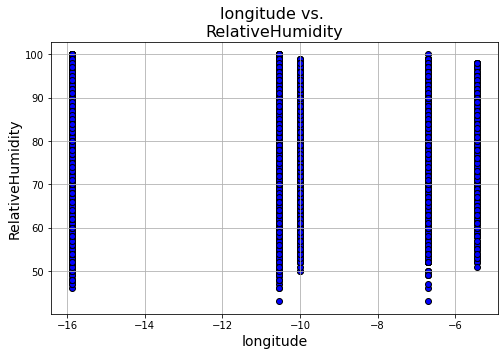

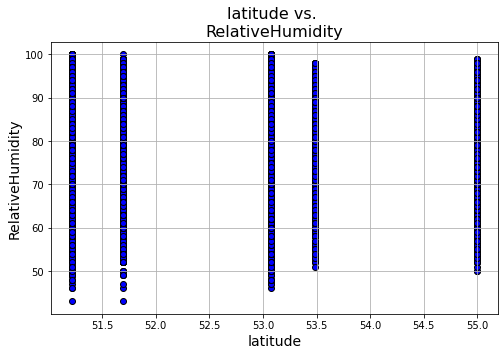

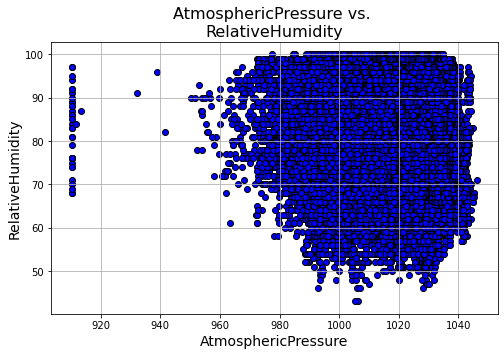

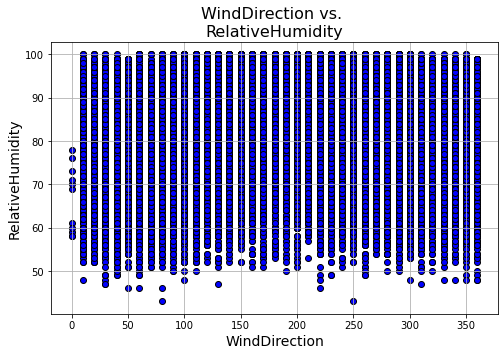

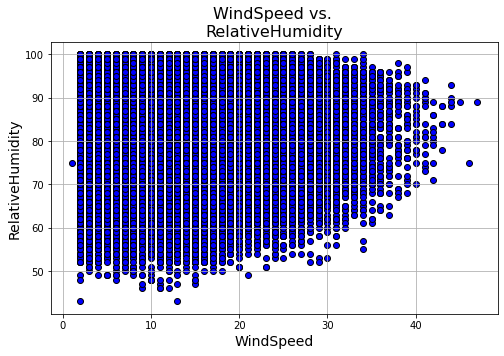

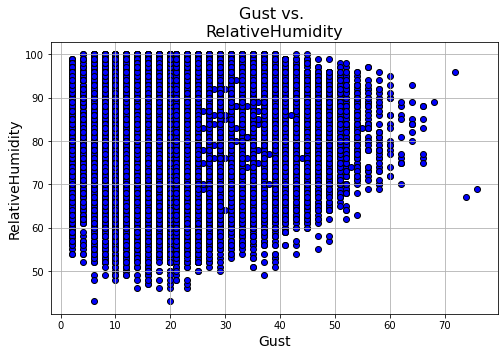

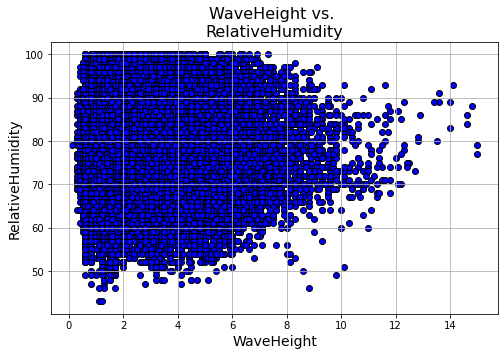

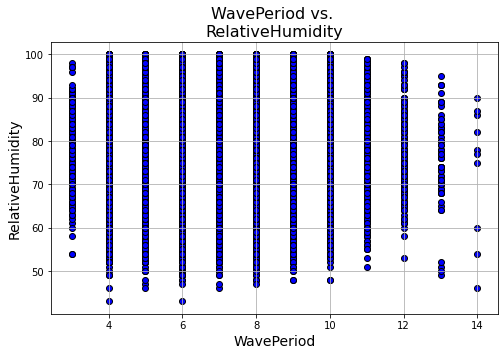

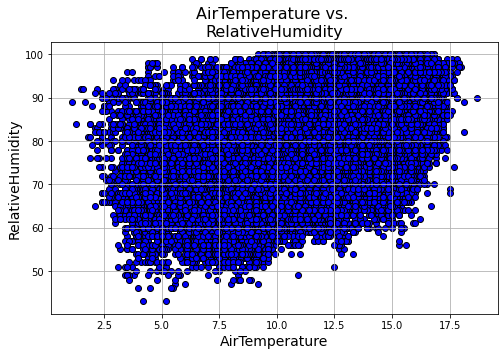

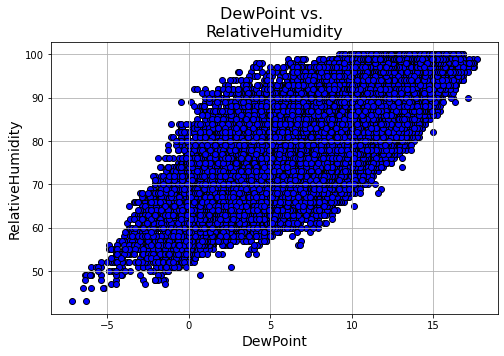

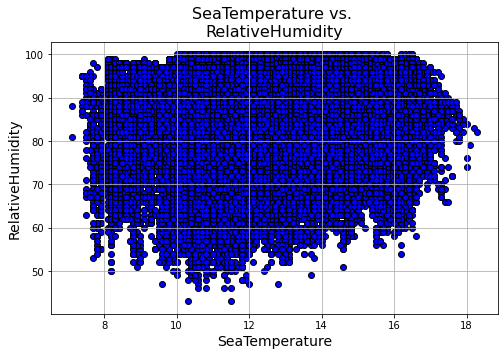

In [4]:
df.dropna(inplace = True)
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nRelativeHumidity".format(c),fontsize=16)
    plt.scatter(x=df[c],y=df['RelativeHumidity'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('RelativeHumidity',fontsize=14)
    plt.show()

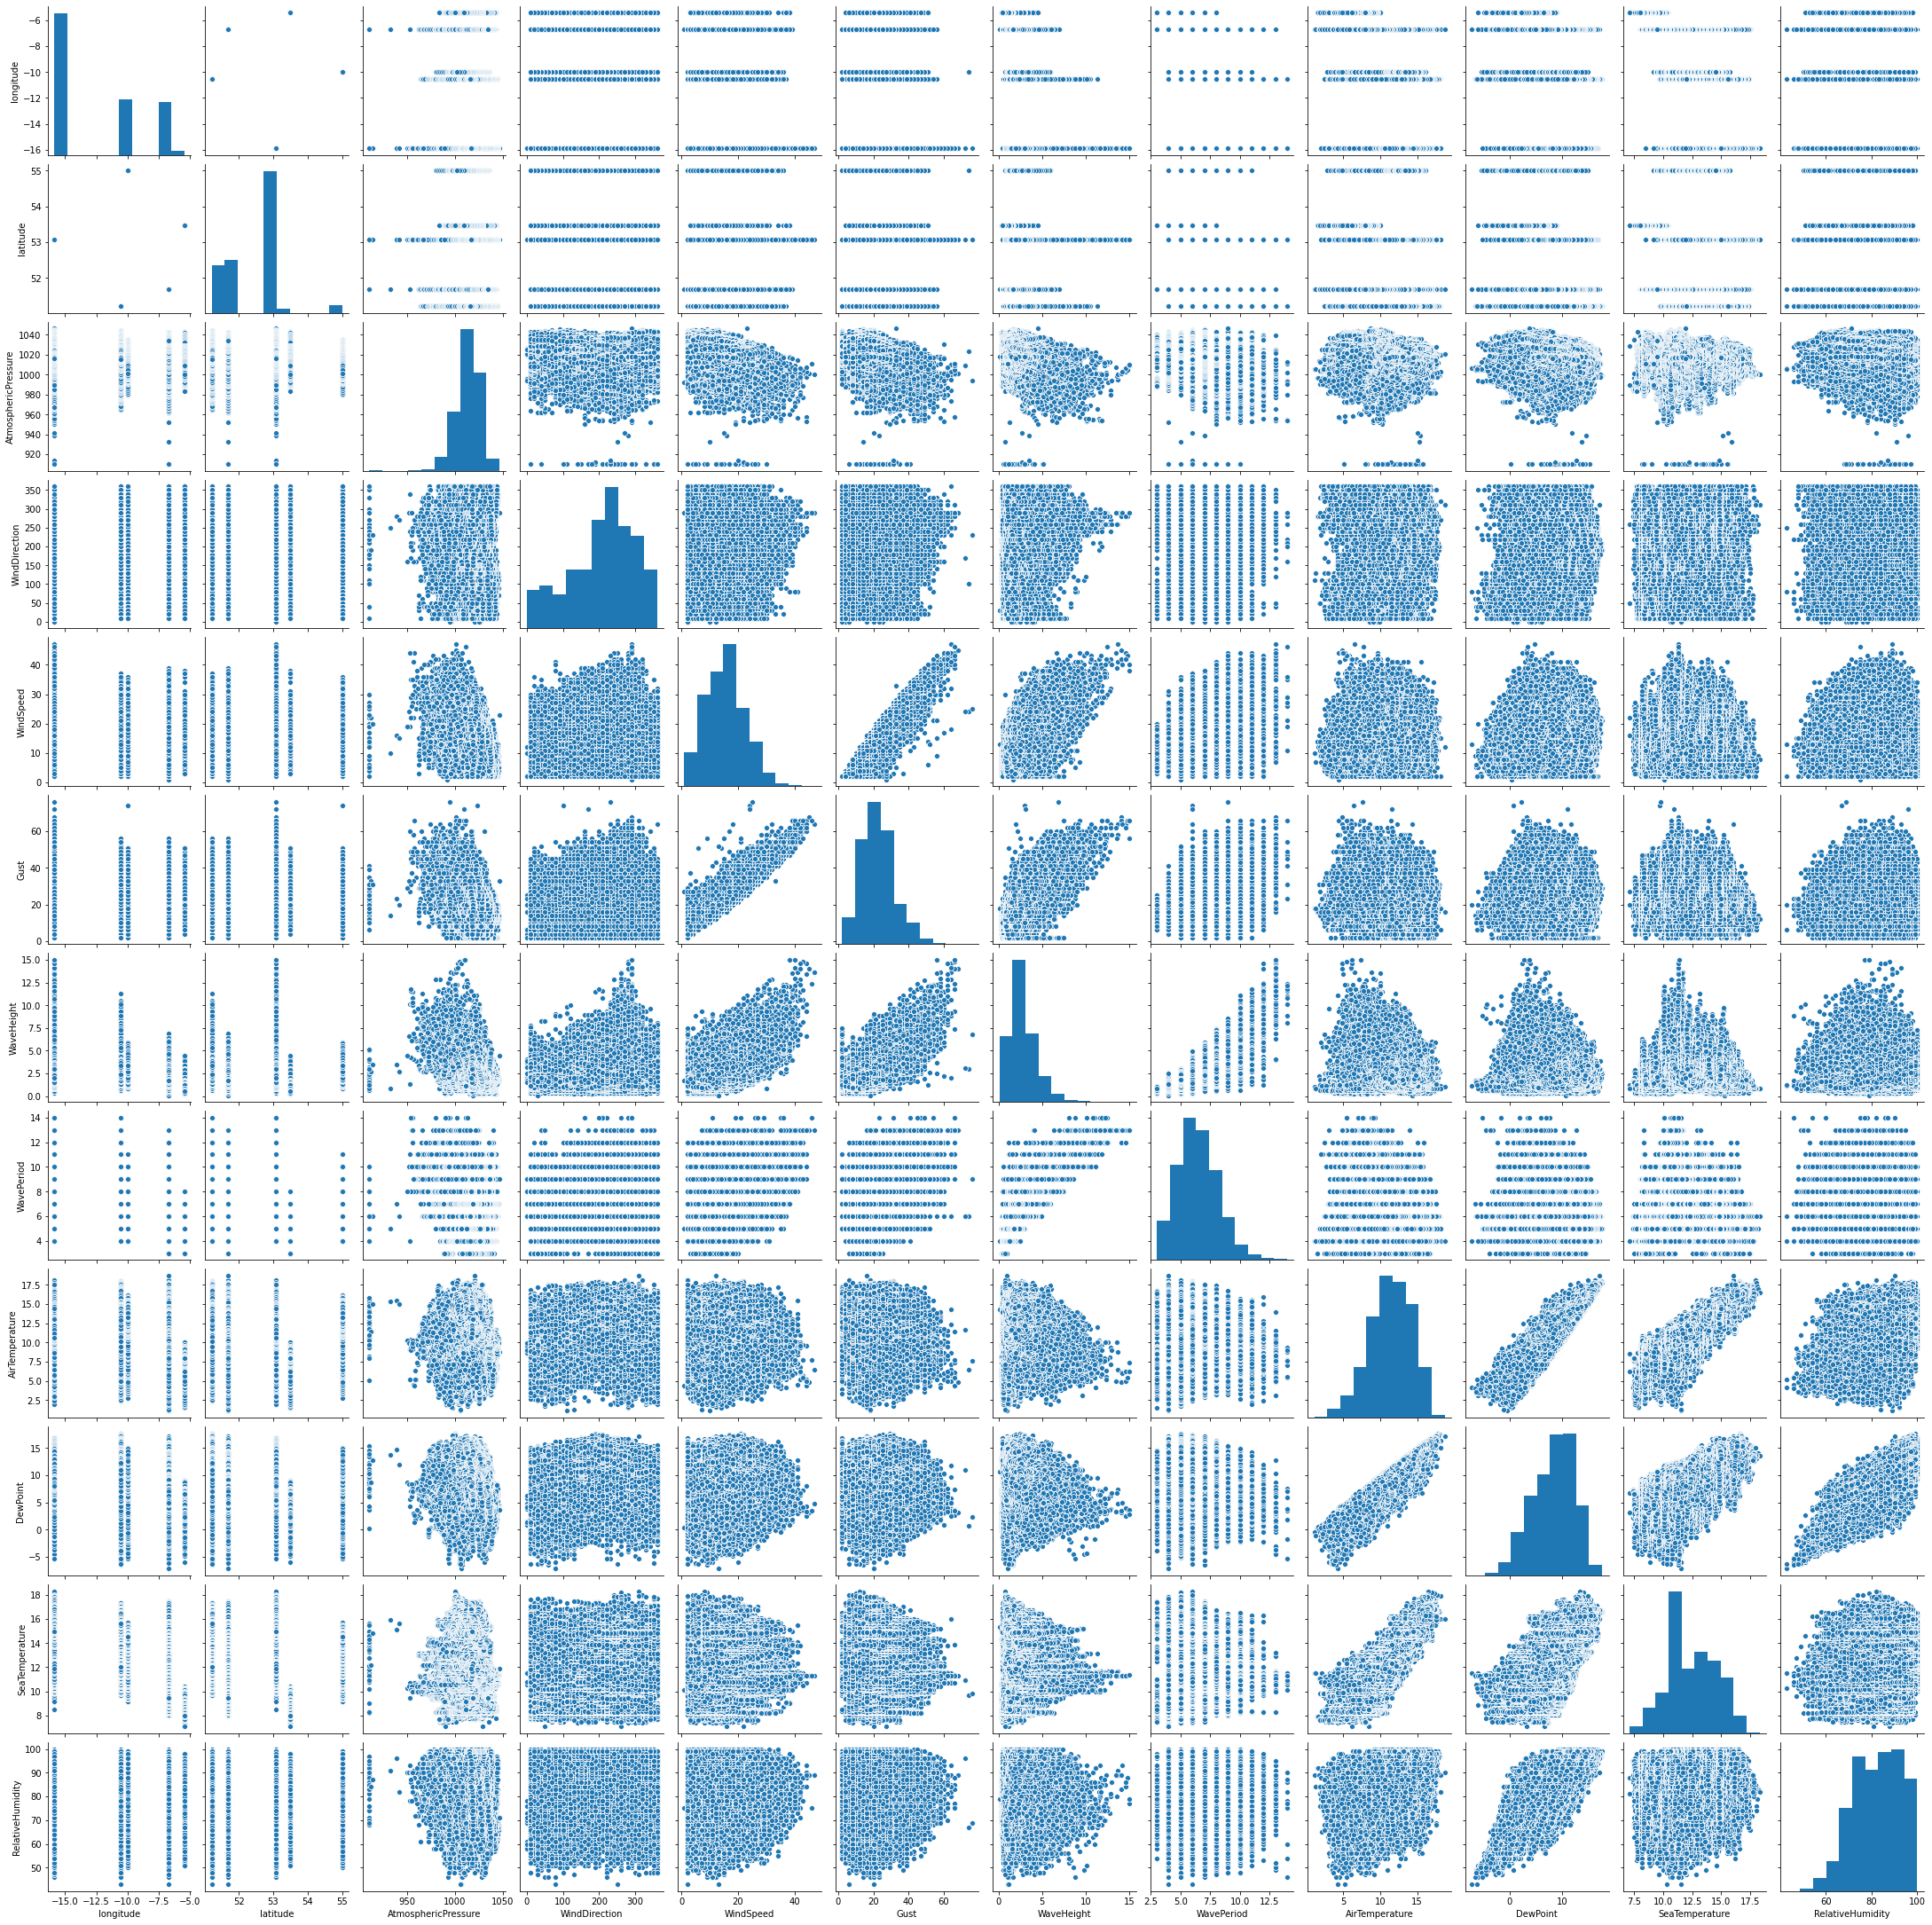

In [6]:
from seaborn import pairplot
pairplot(df)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1].values, test_size=0.2)
print(X_train1.shape)

class CustomScaler():
    
        def __init__(self, X_Scale, y_Scale ) :
        
            self.X_Scale =   X_Scale 
            self.y_Scale =   y_Scale
            
            self.x_num =     [np.min(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            self.x_maxs =    [np.max(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            self.x_mins =    [np.min(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            
            self.y_num =     np.mean(self.y_Scale)
            self.y_max_min = np.min(self.y_Scale) - np.min(self.y_Scale)

        def scaleX(self, x_value):
            x = x_value.copy()
            for i in range(x.shape[1]):
                
                x[:,i]= (x[:,i] - self.x_num[i])/(self.x_maxs[i]-self.x_mins[i])
            return x

        def inverseScaleX(self, x_value):
            x = x_value.copy()
            
            for i in range(x.shape[1]):
                x[:,i]= (x[:,i] * (self.x_maxs[i]-self.x_mins[i])) + self.x_num[i]
            return x



        

        def scaleY(self, y_value):
            y = y_value.copy()
            ys = (y - self.y_num)/(self.y_max_min)
            return ys

        def inverseScaleY(self, y_value):
            y = y_value.copy()
            ys = (y * self.y_max_min) + self.y_num
            return ys


        



custom_scaler = CustomScaler(X_train1,y_train1)
    
X_train = custom_scaler.scaleX(X_train1.copy())
y_train = custom_scaler.scaleY(y_train1.copy())
transform = None


print(X_train[-70000: -1])

print(X_test1[:10,:],y_test1[:10])



In [ ]:
# # transformer = KernelPCA(0.95, kernel='linear').fit(X_train)
# # transformer = PCA(0.99).fit(X_train)
# transformer = decomposition.TruncatedSVD(n_components=7, algorithm='arpack').fit(X_train)

# X_train = transformer.transform(X_train)
# print(X_train)

# transformer = TruncatedSVD(6).fit(X_train)
# X_train = transformer.transform(X_train)
# X_train

# transformer = FastICA(6).fit(X_train)
# X_train = transformer.transform(X_train)
# X_train



# This is not working for some reason needs to be fixed 
# transformer = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(np.asarray(X_train).astype(float),y_train)
# X_train = transformer.transform(X_train)
transformer = None

In [ ]:

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
from sklearn.model_selection import cross_val_score
 
def build_model():    
    optimizer="sgd"
    dropout_rate=0.5
    activation = 'relu'
    model = keras.Sequential()
    model.add(Dense(10, activation = activation,input_dim = X_train.shape[1], name = "layer1"))
    model.add(Dense(20, activation = activation, name = "layer2"))
    model.add(Dense(20, activation = activation, name = "layer5"))
    model.add(Dense(20, activation = activation, name = "layer6"))
#     model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal', name = "layer7"))
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

# regressor = KerasRegressor(build_fn = build_model, batch_size = 1024, epochs = 500)
# accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train,scoring='neg_mean_squared_error',cv = 5, n_jobs = 1)
# mean = accuracies.mean()
# variance = accuracies.std()
# print(mean)
# print(variance)

regressor = KerasRegressor(build_fn = build_model, batch_size = 1024, epochs = 1000)
history = regressor.fit(X_train, y_train)



In [ ]:
# define the grid search parameters
# param_grid = {              
#               'batch_size':[1024],
#               'epochs' :              [1000],
#               'optimizer' :           ['Adam', 'sgd','RMSprop','Adamax'],
#               'dropout_rate' :        [0.5],
#               'activation' :          ['relu', 'sigmoid']
#              }

# gs = GridSearchCV(
#         estimator=regressor,
#         param_grid=param_grid, 
#         cv=5, 
#         verbose=2
#     )
    
# fitted_model = gs.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
transformer = None
if transformer:
    y_pred = regressor.predict(transformer.transform(custom_scaler.scaleX(np.asarray(X_test1).astype('float32'))))
else :
    y_pred = regressor.predict((custom_scaler.scaleX(np.asarray(X_test1).astype('float32'))))

# y_pred = max_min*y_pred + y_min
print(mean_squared_error(custom_scaler.inverseScaleY(y_pred), y_test1))
y_test1

In [ ]:
np.column_stack((y_test1,custom_scaler.inverseScaleY(y_pred)))

In [ ]:
preds = pd.DataFrame({"preds":custom_scaler.inverseScaleY(y_pred), "true":y_test1})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")